<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/17_video_augmentation_opencv_albumentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q albumentations opencv-python-headless

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from albumentations import Compose, RandomBrightnessContrast, Blur, HorizontalFlip
import os

In [5]:
# Step 1: Use a sample video file
from google.colab import files
uploaded = files.upload()

video_path = next(iter(uploaded))

Saving SampleVideo_1280x720_1mb.mp4 to SampleVideo_1280x720_1mb (1).mp4


In [6]:
# Step 2: Read first few frames using OpenCV
cap = cv2.VideoCapture(video_path)
original_frames = []
while cap.isOpened() and len(original_frames) < 5:
    ret, frame = cap.read()
    if not ret:
        break
    original_frames.append(frame)
cap.release()

In [7]:
# Step 3: Define augmentation pipeline
augmentation = Compose([
    RandomBrightnessContrast(p=0.5),
    Blur(blur_limit=3, p=0.5),
    HorizontalFlip(p=0.5)
])

In [8]:
# Step 4: Apply augmentation to frames
augmented_frames = [augmentation(image=f)["image"] for f in original_frames]


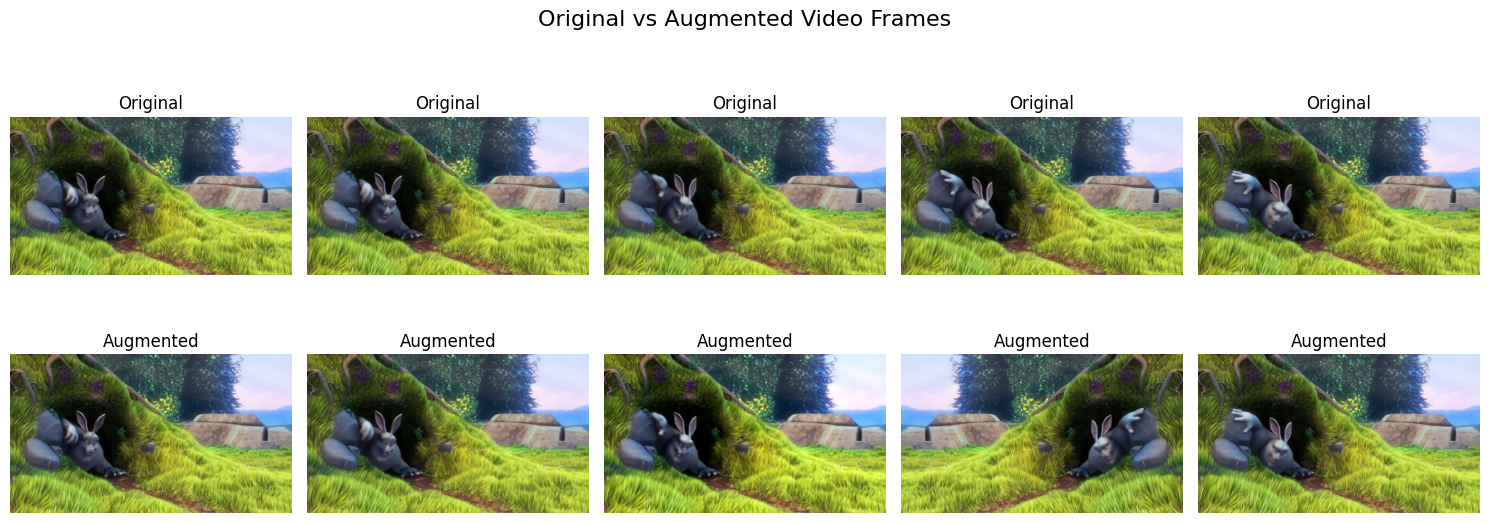

In [9]:
# Step 5: Visualize side by side
fig, axs = plt.subplots(2, len(original_frames), figsize=(15, 6))
for i in range(len(original_frames)):
    axs[0, i].imshow(cv2.cvtColor(original_frames[i], cv2.COLOR_BGR2RGB))
    axs[0, i].set_title("Original")
    axs[0, i].axis('off')
    axs[1, i].imshow(cv2.cvtColor(augmented_frames[i], cv2.COLOR_BGR2RGB))
    axs[1, i].set_title("Augmented")
    axs[1, i].axis('off')
plt.suptitle("Original vs Augmented Video Frames", fontsize=16)
plt.tight_layout()
plt.show()
